In [1]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
All_season = pd.read_csv("Datasets/Bundesliga/All_seasons")
# Title_secured = pd.read_excel("Datasets/Seasons/premier_league_title_secured.xlsx")

In [3]:
All_season.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Attendance,Top Team Scorer,Goalkeeper,Notes,Season,Goals scored by top team scorer,Promoted,Years_in_League_after_promotion,Same_Rank_As_Last_Season
0,1,Bayern Munich,34,19,12,3,67,26,41,50,1.47,NaN,Roland Wohlfarth,NaN,→ European Cup via league finish,1988-1989,17,No,1,0
1,2,Köln,34,18,9,7,58,30,28,45,1.32,NaN,Thomas Allofs,NaN,→ UEFA Cup via league finish,1988-1989,17,No,1,0
2,3,Werder Bremen,34,18,8,8,55,32,23,44,1.29,NaN,"Karl-Heinz Riedle, Frank Neubarth",NaN,→ UEFA Cup via league finish,1988-1989,13,No,1,0
3,4,Hamburger SV,34,17,9,8,60,36,24,43,1.26,NaN,Uwe Bein,NaN,→ UEFA Cup via league finish,1988-1989,15,No,1,0
4,5,Stuttgart,34,16,7,11,58,49,9,39,1.15,NaN,"Jürgen Klinsmann, Fritz Walter",NaN,→ UEFA Cup via league finish,1988-1989,13,No,1,0


In [4]:
# Title_secured.head()

Lets answer the question - Is Premier League getting competitive

#### First of all, Lets understand how are we going to measure competitiveness of the league

#### Here are the few measure which will help understand and measure the competitiveness of the league
- Points distribution, Gap between the teams & Goal Difference distribution 
- How early the league title is decided?
- Number of different champions over time.
- Champions League & Relegation battle.


#### 1. Points distribution, Gap between the teams & Goal Difference distribution 

In [5]:
rank_1 = All_season.loc[All_season['Rk'] == 1]
atleast_top_4 = All_season.loc[All_season['Rk'] == 4]
mid_table = All_season.loc[(All_season['Rk'] >= 7) & (All_season['Rk'] <= 13 )]
escape_relegation = All_season.loc[(All_season['Rk'] >= 14) & (All_season['Rk'] <=17 )]
relegated = All_season.loc[(All_season['Rk'] >= 18) & (All_season['Rk'] <=20 )]

In [6]:
rank_1 = rank_1.copy()
relegated = relegated.copy()
atleast_top_4 = atleast_top_4.copy()
mid_table = mid_table.copy()
escape_relegation = escape_relegation.copy()

rank_1.loc[:,'Pts_moving_avg'] = rank_1['Pts'].rolling(window=10).mean()
relegated.loc[:, 'Pts_moving_avg_'] = relegated['Pts'].rolling(window=10).mean()
atleast_top_4.loc[:, 'Pts_moving_avg_'] = atleast_top_4['Pts'].rolling(window=10).mean()
mid_table.loc[:, 'Pts_moving_avg_'] = mid_table['Pts'].rolling(window=10).mean()
escape_relegation.loc[:, 'Pts_moving_avg_'] = escape_relegation['Pts'].rolling(window=10).mean()

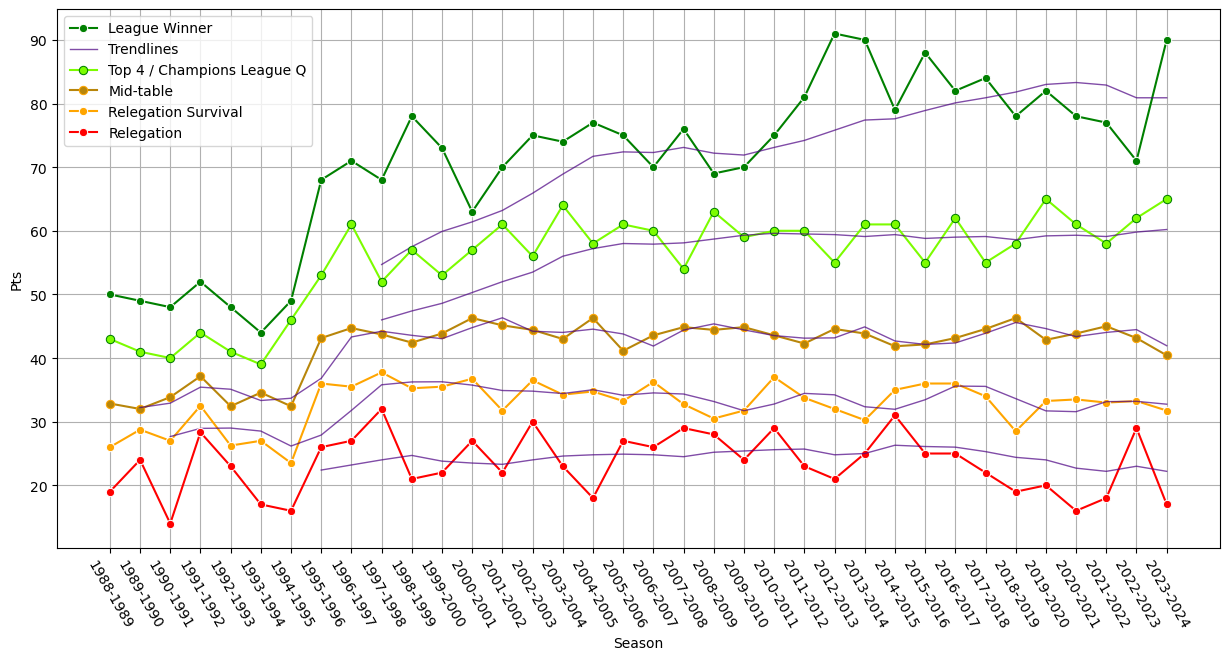

In [7]:
plt.figure(figsize=(15,7))
# Champion
sns.lineplot(data=rank_1,x='Season',y='Pts',c='g',marker="o",label= "League Winner")
sns.lineplot(data=rank_1,x='Season',y='Pts_moving_avg',c='indigo',linewidth=1,alpha=.7,label= "Trendlines") # Trendline
# Atlest top 4 or Champions league position.
sns.lineplot(data=atleast_top_4,x='Season',y='Pts',c='lawngreen',marker="o",ms = 6, mec = 'g',label= "Top 4 / Champions League Q")
sns.lineplot(data=atleast_top_4,x='Season',y='Pts_moving_avg_',c='indigo',linewidth=1,alpha=.7) # Trendline
# Mid- Table clubs
sns.lineplot(data=mid_table,x='Season',y='Pts',c='darkgoldenrod',marker="o",errorbar=None,ms = 6, mec = 'orange',label= "Mid-table")
sns.lineplot(data=mid_table,x='Season',y='Pts_moving_avg_',c='indigo',linewidth=1,alpha=.7,errorbar=None) # Trendline.
# # Escape_relegation
sns.lineplot(data=escape_relegation,x='Season',y='Pts',c='orange',marker="o",errorbar=None,label= "Relegation Survival")
sns.lineplot(data=escape_relegation,x='Season',y='Pts_moving_avg_',c='indigo',linewidth=1,alpha=.7,errorbar=None) # Trendline
# Relegated 
sns.lineplot(data=relegated,x='Season',y='Pts',c='r',marker="o",errorbar=None,label= "Relegation")
sns.lineplot(data=relegated,x='Season',y='Pts_moving_avg_',c='indigo',linewidth=1,alpha=.7,errorbar=None) # Trendline

plt.legend()
plt.grid()
x,y = plt.xticks(rotation=300)

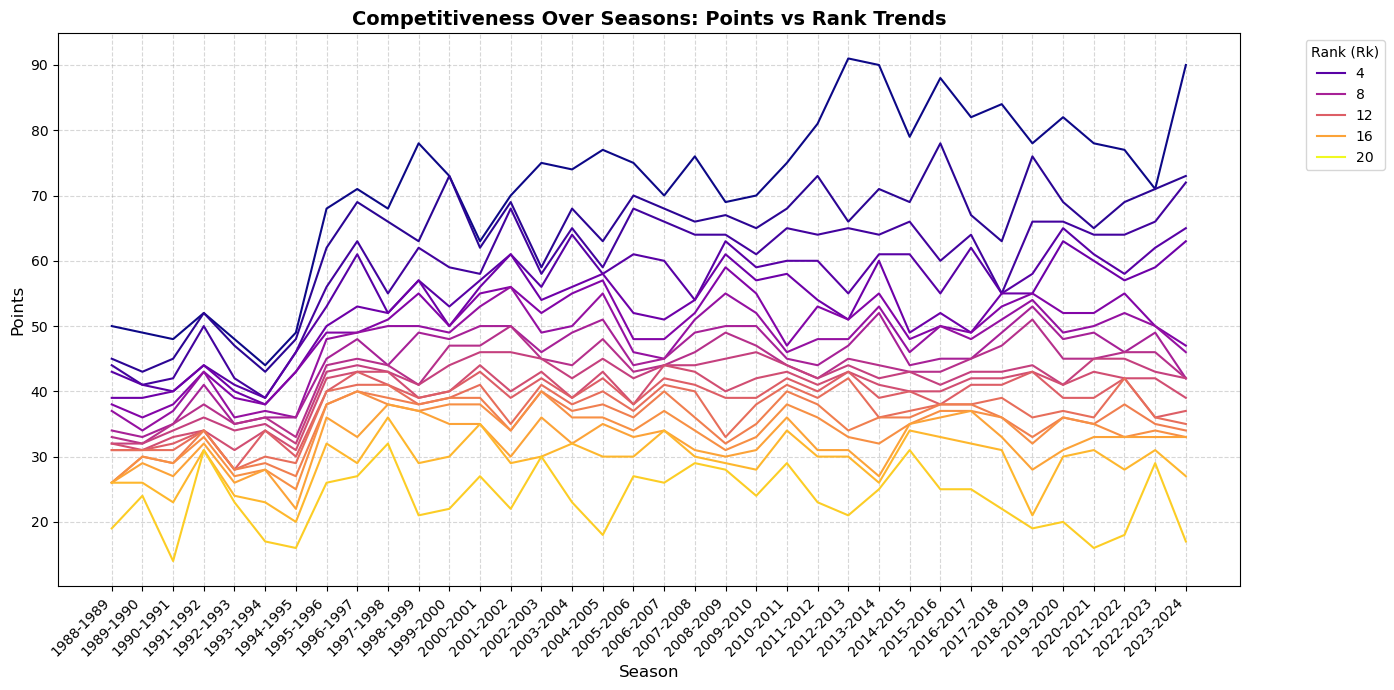

In [8]:
plt.figure(figsize=(14, 7))

# Improved colormap and better color control
sns.lineplot(
    data=All_season, 
    x='Season', 
    y='Pts', 
    hue='Rk', 
    palette='plasma',  
    alpha=1,        # Transparency to reduce overlap clutter
    linewidth=1.5     # Thicker lines for clarity
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add title and labels
plt.xlabel('Season', fontsize=12)
plt.ylabel('Points', fontsize=12)
plt.title('Competitiveness Over Seasons: Points vs Rank Trends', fontsize=14, fontweight='bold')

# Show legend outside the plot to avoid clutter
plt.legend(title="Rank (Rk)", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to avoid label overlap
plt.tight_layout()

plt.show()

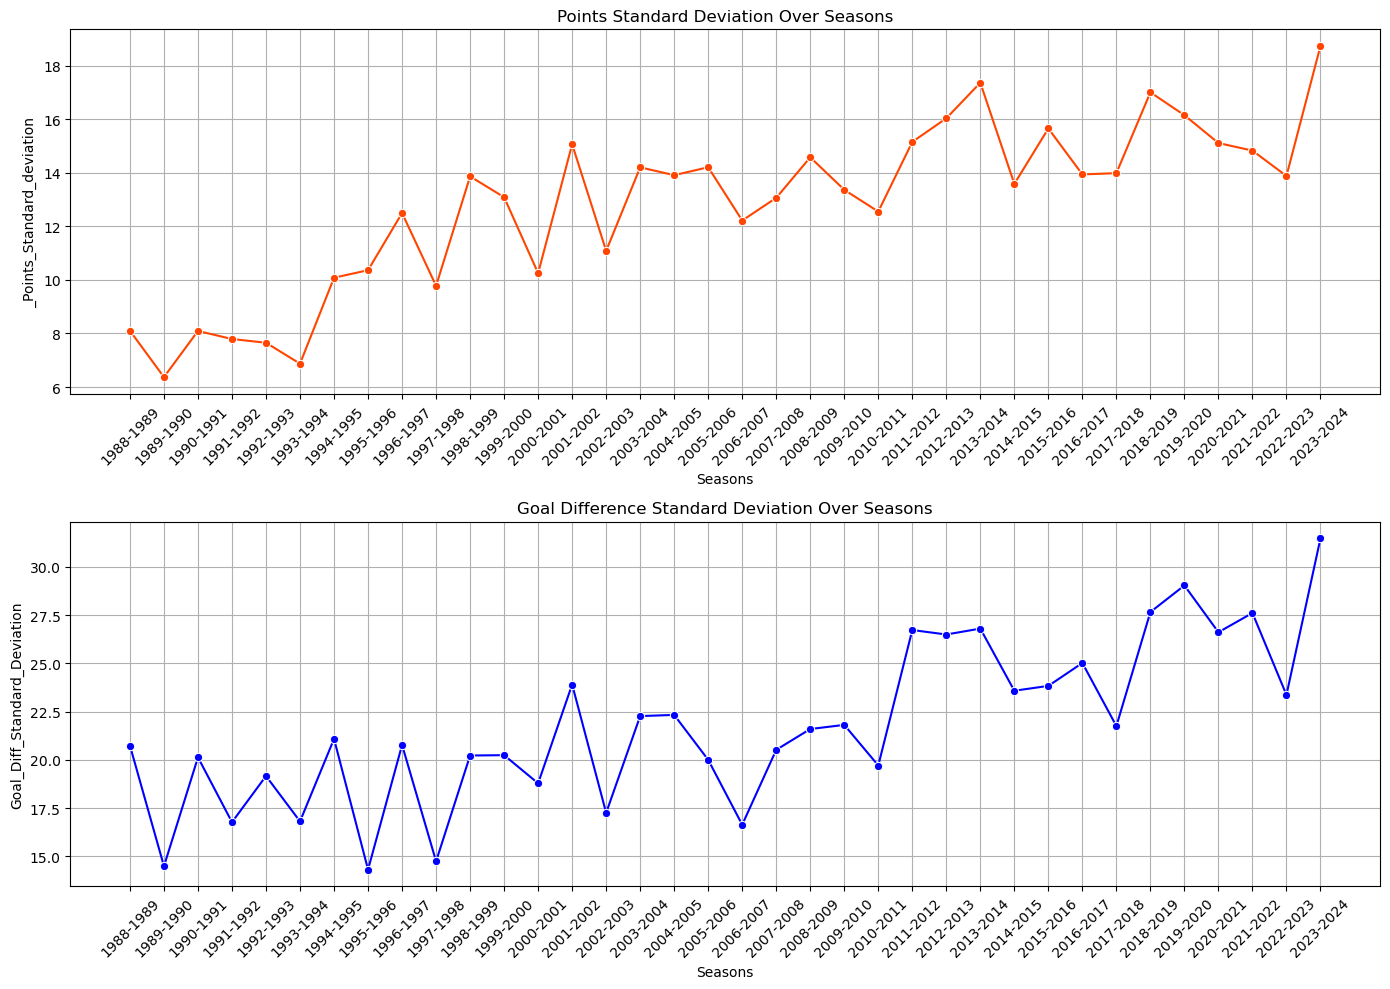

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
axes[0].grid(True)

competitive = All_season.groupby(by='Season')['Pts'].std().reset_index()
competitive.columns = ['Seasons','_Points_Standard_deviation']
sns.lineplot(ax=axes[0],data=competitive,y='_Points_Standard_deviation',x='Seasons',c='orangered',marker = "o")
axes[0].set_xticks(range(len(competitive['Seasons'])))  # Set tick positions
axes[0].set_xticklabels(competitive['Seasons'], rotation=45)  # Set tick labels
axes[0].set_title('Points Standard Deviation Over Seasons')
axes[0].grid(True)


# Goal difference standard deviation
goal_diff = All_season.groupby(by='Season')['GD'].std().reset_index()
goal_diff.columns = ['Seasons', 'Goal_Diff_Standard_Deviation']
sns.lineplot(ax=axes[1], data=goal_diff, y='Goal_Diff_Standard_Deviation', x='Seasons',c='blue',marker = "o")
axes[1].set_xticks(range(len(goal_diff['Seasons'])))  # Set tick positions
axes[1].set_xticklabels(goal_diff['Seasons'], rotation=45)  # Set tick labels
axes[1].set_title('Goal Difference Standard Deviation Over Seasons')
axes[1].grid(True)


plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [10]:
Competitive_index = All_season.groupby(by=['Season']).agg(Champions = ('Squad', 'first')).reset_index()
Competitive_index.columns = ['Seasons', 'Champions']

Competitive_index = Competitive_index.loc[Competitive_index['Seasons'] >= '1988-1989']
Competitive_index

,Seasons,Champions
0,1988-1989,Bayern Munich
1,1989-1990,Bayern Munich
2,1990-1991,Kaiserslautern
3,1991-1992,Stuttgart
4,1992-1993,Werder Bremen
5,1993-1994,Bayern Munich
6,1994-1995,Dortmund
7,1995-1996,Dortmund
8,1996-1997,Bayern Munich
9,1997-1998,Kaiserslautern


In [11]:
# Competitive_index = Title_secured[Title_secured.columns[:-1]]
# Competitive_index.columns = ['Seasons', 'Champion', 'Matchday Title Secured']
# Competitive_index = Competitive_index.loc[Competitive_index['Seasons'] > '1988-1989']

In [12]:
competitive.head()

,Seasons,_Points_Standard_deviation
0,1988-1989,8.102287
1,1989-1990,6.370890
2,1990-1991,8.095024
3,1991-1992,7.793385
4,1992-1993,7.654295


In [13]:
goal_diff.head()

,Seasons,Goal_Diff_Standard_Deviation
0,1988-1989,20.744950
1,1989-1990,14.495435
2,1990-1991,20.134840
3,1991-1992,16.777177
4,1992-1993,19.167988


In [14]:
Competitive_index = Competitive_index.merge(competitive,on="Seasons",how="left")

In [15]:
Competitive_index = Competitive_index.merge(goal_diff,on="Seasons",how="left")

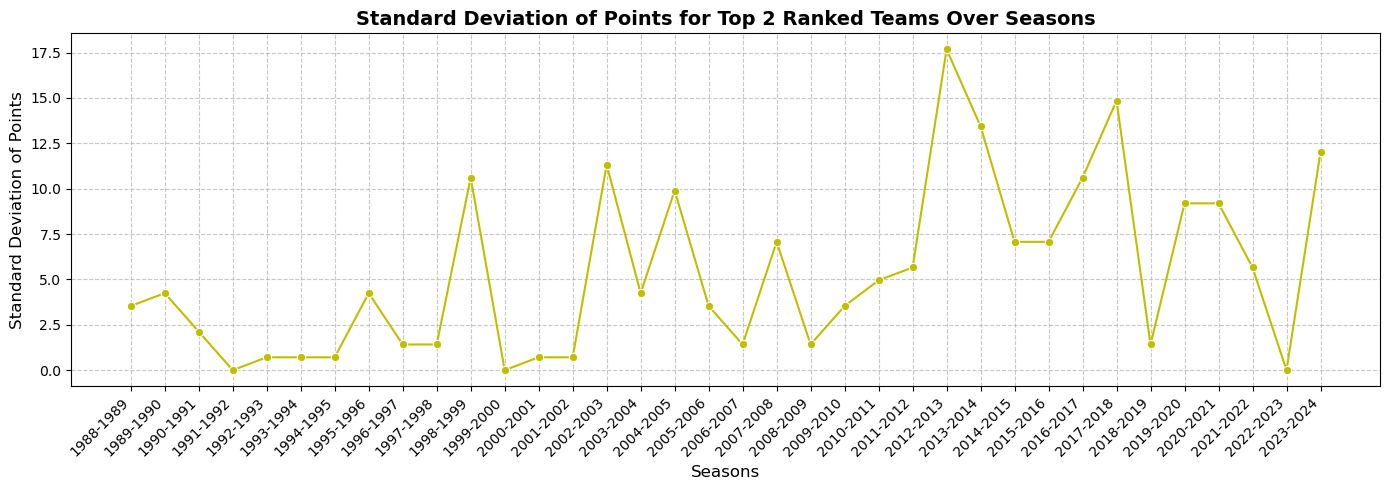

In [16]:
# Set figure size
plt.figure(figsize=(14, 5))

# Filter top 2 ranked teams
top_2_comp = All_season.loc[All_season['Rk'] <= 2]
top_2_comp = top_2_comp.groupby(by='Season')['Pts'].std().reset_index()
top_2_comp.columns = ['Seasons', 'Ttitle_race_Points_Standard_deviation']

# Create line plot with markers and styling
sns.lineplot(data=top_2_comp, x='Seasons', y='Ttitle_race_Points_Standard_deviation', marker='o', linestyle='-', color='y')

plt.xticks(rotation=45, ha='right')  # Rotate for better readability
plt.xticks(range(len(top_2_comp['Seasons'])), top_2_comp['Seasons']) 

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Standard Deviation of Points', fontsize=12)
plt.title('Standard Deviation of Points for Top 2 Ranked Teams Over Seasons', fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
top_2_comp.head()

,Seasons,Ttitle_race_Points_Standard_deviation
0,1988-1989,3.535534
1,1989-1990,4.242641
2,1990-1991,2.121320
3,1991-1992,0.000000
4,1992-1993,0.707107


In [18]:
Competitive_index = Competitive_index.merge(top_2_comp,on="Seasons",how="left")

In [19]:
Competitive_index

,Seasons,Champions,_Points_Standard_deviation,Goal_Diff_Standard_Deviation,Ttitle_race_Points_Standard_deviation
0,1988-1989,Bayern Munich,8.102287,20.744950,3.535534
1,1989-1990,Bayern Munich,6.370890,14.495435,4.242641
2,1990-1991,Kaiserslautern,8.095024,20.134840,2.121320
3,1991-1992,Stuttgart,7.793385,16.777177,0.000000
4,1992-1993,Werder Bremen,7.654295,19.167988,0.707107
5,1993-1994,Bayern Munich,6.873269,16.817358,0.707107
6,1994-1995,Dortmund,10.082017,21.093629,0.707107
7,1995-1996,Dortmund,10.363965,14.319875,4.242641
8,1996-1997,Bayern Munich,12.498889,20.778949,1.414214
9,1997-1998,Kaiserslautern,9.778762,14.748878,1.414214


#### 2. How early the league title is decided?

In [20]:
# Title_secured.head()

In [21]:
# plt.figure(figsize=(14, 5))

# sns.lineplot(data=Title_secured,x="Season",y="Matchday Title Secured", marker='o', linestyle='-', color='g')
# plt.xticks(rotation=45, ha='right')  # Rotate for better readability

# # Add grid, title, and labels
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.xlabel('Seasons', fontsize=12)
# plt.ylabel('Matchday Title Secured', fontsize=12)
# plt.title('Matchdays on which the title was secured over seasons', fontsize=14, fontweight='bold')

# # Adjust layout
# plt.tight_layout()
# plt.show()

#### 3. Number of different champions over time.

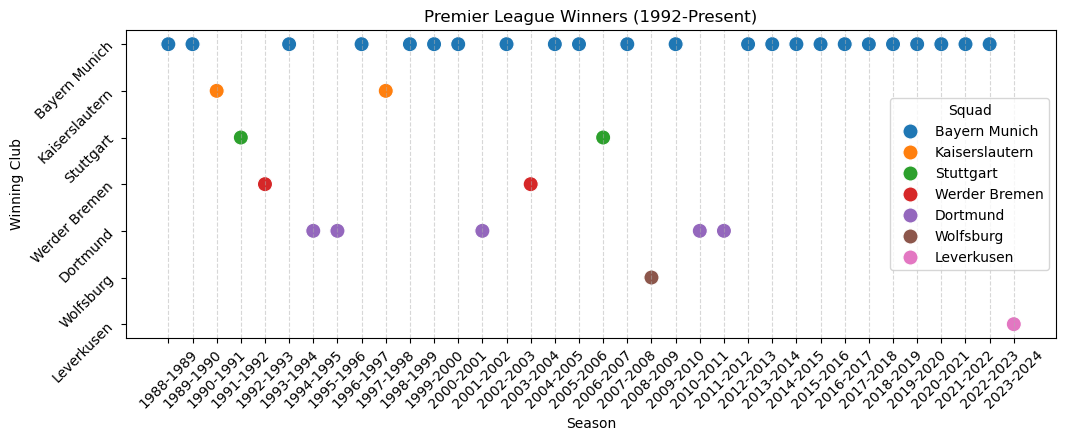

In [22]:
rank_1[['Squad','Season']]
plt.figure(figsize=(12,4))
sns.scatterplot(data=rank_1 ,x= 'Season',y='Squad',marker = "o",hue="Squad",s= 120)
plt.xlabel("Season")
plt.ylabel("Winning Club")
plt.title("Premier League Winners (1992-Present)")
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [26]:
Competitive_index.head()

,Seasons,Champions,_Points_Standard_deviation,Goal_Diff_Standard_Deviation,Ttitle_race_Points_Standard_deviation
0,1988-1989,Bayern Munich,8.102287,20.744950,3.535534
1,1989-1990,Bayern Munich,6.370890,14.495435,4.242641
2,1990-1991,Kaiserslautern,8.095024,20.134840,2.121320
3,1991-1992,Stuttgart,7.793385,16.777177,0.000000
4,1992-1993,Werder Bremen,7.654295,19.167988,0.707107


In [27]:
Competitive_index['Year'] = list(range(1988, 2024))

In [28]:
Competitive_index

,Seasons,Champions,_Points_Standard_deviation,Goal_Diff_Standard_Deviation,Ttitle_race_Points_Standard_deviation,Year
0,1988-1989,Bayern Munich,8.102287,20.744950,3.535534,1988
1,1989-1990,Bayern Munich,6.370890,14.495435,4.242641,1989
2,1990-1991,Kaiserslautern,8.095024,20.134840,2.121320,1990
3,1991-1992,Stuttgart,7.793385,16.777177,0.000000,1991
4,1992-1993,Werder Bremen,7.654295,19.167988,0.707107,1992
5,1993-1994,Bayern Munich,6.873269,16.817358,0.707107,1993
6,1994-1995,Dortmund,10.082017,21.093629,0.707107,1994
7,1995-1996,Dortmund,10.363965,14.319875,4.242641,1995
8,1996-1997,Bayern Munich,12.498889,20.778949,1.414214,1996
9,1997-1998,Kaiserslautern,9.778762,14.748878,1.414214,1997


In [29]:
Competitive_index['Unique_Champions_Last_5'] = Competitive_index.apply(
    lambda row: Competitive_index[(Competitive_index['Year'] >= row['Year'] - 4) & (Competitive_index['Year'] <= row['Year'])]['Champions'].nunique(),
    axis=1
)

Competitive_index

,Seasons,Champions,_Points_Standard_deviation,Goal_Diff_Standard_Deviation,Ttitle_race_Points_Standard_deviation,Year,Unique_Champions_Last_5
0,1988-1989,Bayern Munich,8.102287,20.744950,3.535534,1988,1
1,1989-1990,Bayern Munich,6.370890,14.495435,4.242641,1989,1
2,1990-1991,Kaiserslautern,8.095024,20.134840,2.121320,1990,2
3,1991-1992,Stuttgart,7.793385,16.777177,0.000000,1991,3
4,1992-1993,Werder Bremen,7.654295,19.167988,0.707107,1992,4
5,1993-1994,Bayern Munich,6.873269,16.817358,0.707107,1993,4
6,1994-1995,Dortmund,10.082017,21.093629,0.707107,1994,5
7,1995-1996,Dortmund,10.363965,14.319875,4.242641,1995,4
8,1996-1997,Bayern Munich,12.498889,20.778949,1.414214,1996,3
9,1997-1998,Kaiserslautern,9.778762,14.748878,1.414214,1997,3


#### 4. Champions League & Relegation battle.

In [30]:
Champion_league_battle = All_season.loc[All_season['Rk'] < 7]
Relegation_battles = All_season.loc[All_season['Rk'] > 14]

In [31]:
Champion_league_battle_std = Champion_league_battle.groupby(by='Season')['Pts'].std().reset_index()
Champion_league_battle_std.columns = ['Seasons', 'UCL_race_Points_Standard_deviation']
Champion_league_battle_std.head()

,Seasons,UCL_race_Points_Standard_deviation
0,1988-1989,4.355074
1,1989-1990,4.370355
2,1990-1991,3.710346
3,1991-1992,4.277850
4,1992-1993,3.763863


In [32]:
Relegation_battles_std = Relegation_battles.groupby(by='Season')['Pts'].std().reset_index()
Relegation_battles_std.columns = ['Seasons', 'Relegation_battle_Points_Standard_deviation']
Relegation_battles_std.head()

,Seasons,Relegation_battle_Points_Standard_deviation
0,1988-1989,3.500000
1,1989-1990,2.753785
2,1990-1991,6.652067
3,1991-1992,3.188521
4,1992-1993,1.825742


In [33]:
All_season.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'Attendance', 'Top Team Scorer', 'Goalkeeper', 'Notes', 'Season',
       'Goals scored by top team scorer', 'Promoted',
       'Years_in_League_after_promotion', 'Same_Rank_As_Last_Season'],
      dtype='object')

In [34]:
Competitive_index = Competitive_index.merge(Champion_league_battle_std,on="Seasons",how="left")

In [35]:
Competitive_index = Competitive_index.merge(Relegation_battles_std,on="Seasons",how="left")

#### 4. Teams with Same  Rank As Last Season

In [36]:
Same_Rank_As_Last_Season = All_season.groupby(by='Season')['Same_Rank_As_Last_Season'].sum().reset_index()
Same_Rank_As_Last_Season.columns = ['Seasons', 'Same_Rank_As_Last_Season']
Same_Rank_As_Last_Season

,Seasons,Same_Rank_As_Last_Season
0,1988-1989,0
1,1989-1990,2
2,1990-1991,1
3,1991-1992,0
4,1992-1993,1
5,1993-1994,3
6,1994-1995,0
7,1995-1996,1
8,1996-1997,0
9,1997-1998,1


In [37]:
Competitive_index = Competitive_index.merge(Same_Rank_As_Last_Season,on="Seasons",how="left")

In [38]:
Competitive_index

,Seasons,Champions,_Points_Standard_deviation,Goal_Diff_Standard_Deviation,Ttitle_race_Points_Standard_deviation,Year,Unique_Champions_Last_5,UCL_race_Points_Standard_deviation,Relegation_battle_Points_Standard_deviation,Same_Rank_As_Last_Season
0,1988-1989,Bayern Munich,8.102287,20.744950,3.535534,1988,1,4.355074,3.500000,0
1,1989-1990,Bayern Munich,6.370890,14.495435,4.242641,1989,1,4.370355,2.753785,2
2,1990-1991,Kaiserslautern,8.095024,20.134840,2.121320,1990,2,3.710346,6.652067,1
3,1991-1992,Stuttgart,7.793385,16.777177,0.000000,1991,3,4.277850,3.188521,0
4,1992-1993,Werder Bremen,7.654295,19.167988,0.707107,1992,4,3.763863,1.825742,1
5,1993-1994,Bayern Munich,6.873269,16.817358,0.707107,1993,4,2.639444,5.228129,3
6,1994-1995,Dortmund,10.082017,21.093629,0.707107,1994,5,2.483277,3.774917,0
7,1995-1996,Dortmund,10.363965,14.319875,4.242641,1995,4,7.393691,5.291503,1
8,1996-1997,Bayern Munich,12.498889,20.778949,1.414214,1996,3,8.671793,5.737305,0
9,1997-1998,Kaiserslautern,9.778762,14.748878,1.414214,1997,3,7.633261,2.828427,1


In [39]:
np.array(Competitive_index['Goal_Diff_Standard_Deviation'])

array([20.74494978, 14.49543539, 20.13483957, 16.77717748, 19.16798802,
       16.81735798, 21.09362881, 14.31987512, 20.77894862, 14.74887832,
       20.2310187 , 20.24845673, 18.78985959, 23.90914174, 17.25926861,
       22.27369855, 22.3343576 , 20.00588149, 16.64508406, 20.52545049,
       21.60337664, 21.81742423, 19.71264151, 26.73178324, 26.49972253,
       26.80649614, 23.58713508, 23.83768643, 25.02469369, 21.75532389,
       27.66394978, 29.04155238, 26.61711082, 27.61500019, 23.36916017,
       31.47921817])

In [40]:
def MinMax_Scaling(feature):
    feat = np.array(feature)
    min_,max_ = np.min(feat),np.max(feat)
    scaling = (feat- min_)/(max_- min_)
    return scaling

In [41]:
Competitive_index_scaled = Competitive_index[['Seasons','Champions']]

In [42]:
# Step 1: Ensure you're working on a proper copy
Competitive_index_scaled = Competitive_index.copy()

# Step 2: Assign scaled values safely using .loc
# Competitive_index_scaled.loc[:, 'Matchday Title Secured'] = MinMax_Scaling(Competitive_index['Matchday Title Secured'])
Competitive_index_scaled.loc[:, '_Points_Standard_deviation'] = MinMax_Scaling(Competitive_index['_Points_Standard_deviation'])
Competitive_index_scaled.loc[:, 'Goal_Diff_Standard_Deviation'] = MinMax_Scaling(Competitive_index['Goal_Diff_Standard_Deviation'])
Competitive_index_scaled.loc[:, 'Ttitle_race_Points_Standard_deviation'] = MinMax_Scaling(Competitive_index['Ttitle_race_Points_Standard_deviation'])
Competitive_index_scaled.loc[:, 'Unique_Champions_Last_5'] = MinMax_Scaling(Competitive_index['Unique_Champions_Last_5'])
Competitive_index_scaled.loc[:, 'UCL_race_Points_Standard_deviation'] = MinMax_Scaling(Competitive_index['UCL_race_Points_Standard_deviation'])
Competitive_index_scaled.loc[:, 'Relegation_battle_Points_Standard_deviation'] = MinMax_Scaling(Competitive_index['Relegation_battle_Points_Standard_deviation'])
Competitive_index_scaled.loc[:, 'Same_Rank_As_Last_Season'] = MinMax_Scaling(Competitive_index['Same_Rank_As_Last_Season'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_15852\3395482283.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.   0.25 0.5  0.75 0.75 1.   0.75 0.5  0.5  0.5  0.5  0.25 0.5
 0.25 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.75 0.5  0.5  0.25 0.25 0.25
 0.   0.   0.   0.   0.   0.   0.   0.25]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Competitive_index_scaled.loc[:, 'Unique_Champions_Last_5'] = MinMax_Scaling(Competitive_index['Unique_Champions_Last_5'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_15852\3395482283.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.5  0.25 0.   0.25 0.75 0.   0.25 0.   0.25 0.25 1.   0.25 0.
 0.5  0.25 0.25 1.   0.75 0.25 0.   0.   0.25 0.5  0.5  0.5  0.75 0.25
 0.25 0.75 0.25 1.   0.25 0.25 0.75 0.  ]' has dtype incompatible with int64, please explicitl

In [43]:
Competitive_index_scaled

,Seasons,Champions,_Points_Standard_deviation,Goal_Diff_Standard_Deviation,Ttitle_race_Points_Standard_deviation,Year,Unique_Champions_Last_5,UCL_race_Points_Standard_deviation,Relegation_battle_Points_Standard_deviation,Same_Rank_As_Last_Season
0,1988-1989,Bayern Munich,0.139972,0.374436,0.20,1988,0.00,0.143262,0.299955,0.00
1,1989-1990,Bayern Munich,0.000000,0.010231,0.24,1989,0.00,0.144431,0.198629,0.50
2,1990-1991,Kaiserslautern,0.139385,0.338880,0.12,1990,0.25,0.093916,0.727967,0.25
3,1991-1992,Stuttgart,0.114999,0.143205,0.00,1991,0.50,0.137351,0.257660,0.00
4,1992-1993,Werder Bremen,0.103755,0.282535,0.04,1992,0.75,0.098012,0.072612,0.25
5,1993-1994,Bayern Munich,0.040614,0.145547,0.04,1993,0.75,0.011953,0.534614,0.75
6,1994-1995,Dortmund,0.300020,0.394756,0.04,1994,1.00,0.000000,0.337286,0.00
7,1995-1996,Dortmund,0.322814,0.000000,0.24,1995,0.75,0.375828,0.543219,0.25
8,1996-1997,Bayern Munich,0.495408,0.376417,0.08,1996,0.50,0.473651,0.603753,0.00
9,1997-1998,Kaiserslautern,0.275504,0.025001,0.08,1997,0.50,0.394164,0.208764,0.25


In [44]:
# Define weights for each feature
weights = {
    # 'Matchday Title Secured': 0.125,
    '_Points_Standard_deviation': 0.142,
    'Goal_Diff_Standard_Deviation': 0.142,
    'Ttitle_race_Points_Standard_deviation': 0.142,
    'Unique_Champions_Last_5': 0.142,
    'UCL_race_Points_Standard_deviation': 0.142,
    'Relegation_battle_Points_Standard_deviation': 0.142,
    'Same_Rank_As_Last_Season': 0.142
}

# Multiply each column by its corresponding weight and sum to get Competitive_Index
Competitive_index_scaled['Competitive_Index'] = (
    # Competitive_index_scaled['Matchday Title Secured'] * weights['Matchday Title Secured'] +
   (1 - Competitive_index_scaled['_Points_Standard_deviation']) * weights['_Points_Standard_deviation'] +
   (1 - Competitive_index_scaled['Goal_Diff_Standard_Deviation']) * weights['Goal_Diff_Standard_Deviation'] +
    (1- Competitive_index_scaled['Ttitle_race_Points_Standard_deviation']) * weights['Ttitle_race_Points_Standard_deviation'] +
    Competitive_index_scaled['Unique_Champions_Last_5'] * weights['Unique_Champions_Last_5'] +
    (1- Competitive_index_scaled['UCL_race_Points_Standard_deviation']) * weights['UCL_race_Points_Standard_deviation'] +
    (1- Competitive_index_scaled['Relegation_battle_Points_Standard_deviation']) * weights['Relegation_battle_Points_Standard_deviation'] +
    Competitive_index_scaled['Same_Rank_As_Last_Season'] * weights['Same_Rank_As_Last_Season']
    
)


In [45]:
final_table = Competitive_index_scaled[['Seasons','Champions','Competitive_Index']]
final_table

,Seasons,Champions,Competitive_Index
0,1988-1989,Bayern Munich,0.545617
1,1989-1990,Bayern Munich,0.696753
2,1990-1991,Kaiserslautern,0.579339
3,1991-1992,Stuttgart,0.688243
4,1992-1993,Werder Bremen,0.767238
5,1993-1994,Bayern Munich,0.813273
6,1994-1995,Dortmund,0.699767
7,1995-1996,Dortmund,0.641576
8,1996-1997,Bayern Munich,0.492849
9,1997-1998,Kaiserslautern,0.676852


In [271]:
final_table.to_csv(f'Datasets/Competitive_Index/Competive_Index_Premier_League')

In [46]:
final_table['Competitive_Index_trend'] = final_table['Competitive_Index'].rolling(window=5).mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15852\3880509263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table['Competitive_Index_trend'] = final_table['Competitive_Index'].rolling(window=5).mean()


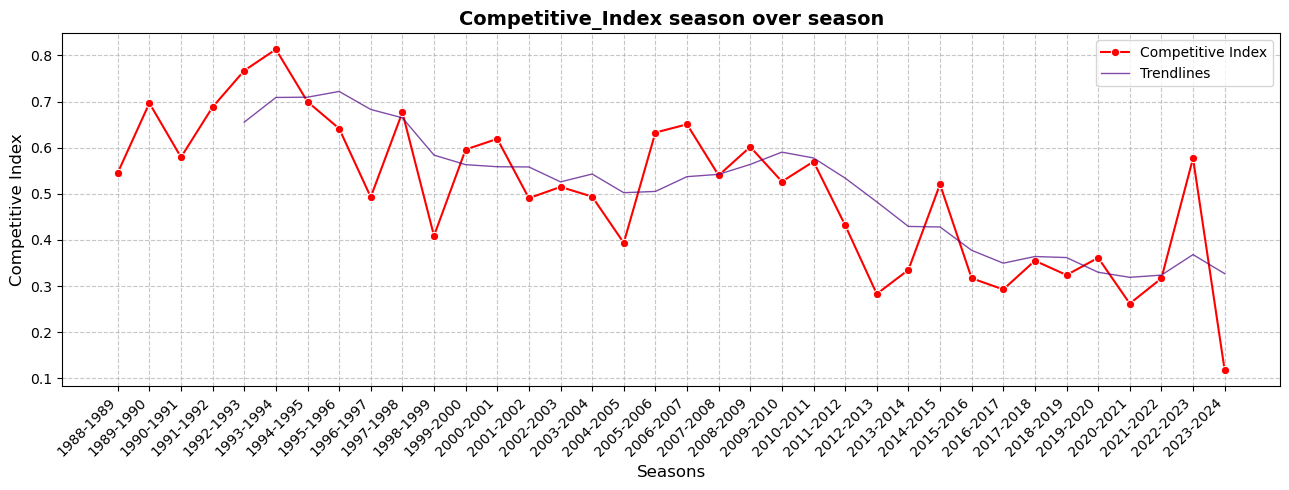

In [47]:

plt.figure(figsize=(13, 5))

sns.lineplot(data=final_table,x="Seasons",y="Competitive_Index", marker='o', linestyle='-', color='r',label= "Competitive Index")
sns.lineplot(data=final_table,x='Seasons',y='Competitive_Index_trend',c='indigo',linewidth=1,alpha=.7,label= "Trendlines") # Trendline

plt.xticks(rotation=45, ha='right')  # Rotate for better readability

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Competitive Index', fontsize=12)
plt.title('Competitive_Index season over season', fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()